# Singular Value Decomposition 

Jack Bennetto's Notebook

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import fetch_olivetti_faces


# Always make it pretty.
plt.style.use('ggplot')

%matplotlib inline

## Review 

#### Question 1:  We went over a 4 step procedure for performing PCA this morning, what were the four steps?  
<br><br>

<details>
  <summary> Click here to see my list</summary>
    1) Standardize columns with mean = 0 and variance = 1 <br>
    2) Create covariance matrix (Note: a covariance matrix of standarized data is referred to as a correlation matrix) <br> 
    3) Find the eigenvectors and eigenvalues of the covariance/correlation matrix <br>
    4) The eigenvectors are the principal components  <br>
</details>

## Singular Value Decomposition

Singular Value Decomposition (SVD) is an alternative way of performing PCA.  Instead of finding the eigendecomposition of the covariance matrix, we will decompose the original matrix of data, X.  As we will find out at the end of this lecture, SVD is directly related to eigen-decomposition.  

### The Singular Value Decomposition

There is a matrix factorization related to PCA, the SVD decomposition.

**Any** $n \times p$ matrix $X$ can be factored as follows

$$ X = U S V $$

Where

  - $U$ is a $n \times n$ orthogonal matrix.
  - $S$ is a $n \times p$ matrix with non-zero entries on the diagonal *only*.
  - $V$ is a $p \times p$ orthogonal matrix.

### Intermission: Orthogonal Matricies

An **orthogonal matrix** is one with the following property:
    
> Any vector $v$, when multiplied by an orthogonal matrix, is simply rotated.

We say that an orthogonal matrix **acts as a rotation**.

It's easy to crate $2 \times 2$ orthogonal matrices.  For any angle $\theta$, the matrix

$$ M_{\theta} =  \left( \begin{array}{cc} 
\cos \theta & - \sin \theta  \\       
sin \theta & cos \theta \\
\end{array} \right) $$

is orthogonal.  

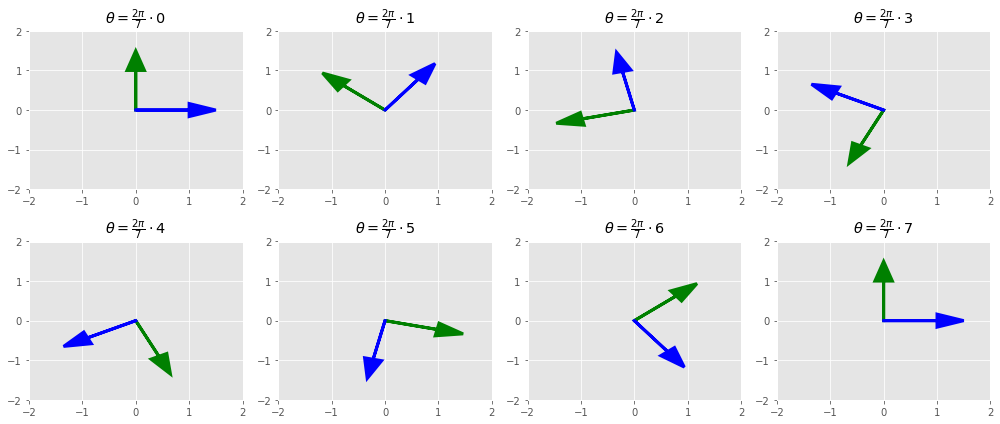

In [2]:
thetas = np.linspace(0, 2*np.pi, num=8)
coord_vectors = np.array([[1, 0], [0, 1]])


fig, axs = plt.subplots(2, 4, figsize=(14, 6))

for i, (theta, ax) in enumerate(zip(thetas, axs.flatten())):
    M = np.array([[-np.sin(theta), np.cos(theta)], 
                  [np.cos(theta), np.sin(theta)]])
    image_vectors = M @ coord_vectors
    ax.arrow(0, 0, image_vectors[0, 0], image_vectors[1, 0],
            head_width=0.33, linewidth=3, head_length=0.5, fc='g', ec='g')
    ax.arrow(0, 0, image_vectors[0, 1], image_vectors[1, 1],
            head_width=0.33, linewidth=3, head_length=0.5, fc='b', ec='b')
    ax.set_title("$\\theta = \\frac{{2\\pi}}{{7}} \\cdot {}$".format(i))
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
plt.tight_layout()

A closely related, and more common, definition of an orthogonal matrix is the following:
    
> An orthogonal matrix $M$ is any matrix satisfying the equation $M^t M = I$.

**Suggested Exercise**: Verify that the $2 \times 2$ matrix of sins and cosines above is orthogonal by computing $M_{\theta}^t M_{\theta}$ and using some basic trigonometric identities.

So the SVD decomposition:
    
$$ X = U S V $$

factors $X$ as three matrices:
    
  - $V$ is orthogonal, hence a rotation, followed by...
  - $S$ is quasi diagonal, so a scaling, followed by...
  - $U$ is orthogonal, so a rotation.
  
The $S$ matrix has positive diagonal entries, these are called the **singular values** of $X$, they are closely related to eigenvalues.

So, for a $4 \times 2$ matrix $X$, the singular value matrix would look like:

$$ S =  \left( \begin{array}{cc} 
\sigma_1 & 0  \\       
0 & \sigma_2 \\
0 & 0 \\
0 & 0 \\
\end{array} \right) $$

and for a $6 \times 3$ like:

$$ S =  \left( \begin{array}{cc} 
\sigma_1 & 0 & 0  \\       
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{array} \right) $$

A visual representation below; Note: The vector A is decomposed in the following below:

$$ A = V \Sigma U $$

![](SVD_breakdown.png)

<!-- ![SVD decomposition](images/svd.png)

**Illustration of the singular value decomposition UΣV* of a real 2×2 matrix M.
Top: The action of M, indicated by its effect on the unit disc D and the two canonical unit vectors e1 and e2.
Left: The action of V*, a rotation, on D, e1, and e2.
Bottom: The action of Σ, a scaling by the singular values σ1 horizontally and σ2 vertically.
Right: The action of U, another rotation.**

Image Source: https://en.wikipedia.org/wiki/Singular_value_decomposition

-->

**Putting it all together:**
<img src='SVD_summary.png' height=400 width=400>

### Example: Image Reconstruction From Singular Values

Recall how we used PCA to "approximately reconstruct" a matrix $M$ from its first few principal components.  We can do the same thing with SVD

$$ X \approx U S_{k} V $$

Here, $S_{k}$ is the matrix created from $S$ by setting **all but the first $k$ singular values to zero**.


In an earlier example we reconstructed faces with only the first few principal components, here we reconstruct a face with only the first few **singular values**.

In [3]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=154)
faces = dataset.data

n_samples, n_features = faces.shape

# Global centering
faces_centered = faces - faces.mean(axis=0)

# Local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [4]:
## Below are functions used for plotting faces data 
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)

## function used for plotting faces data 
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

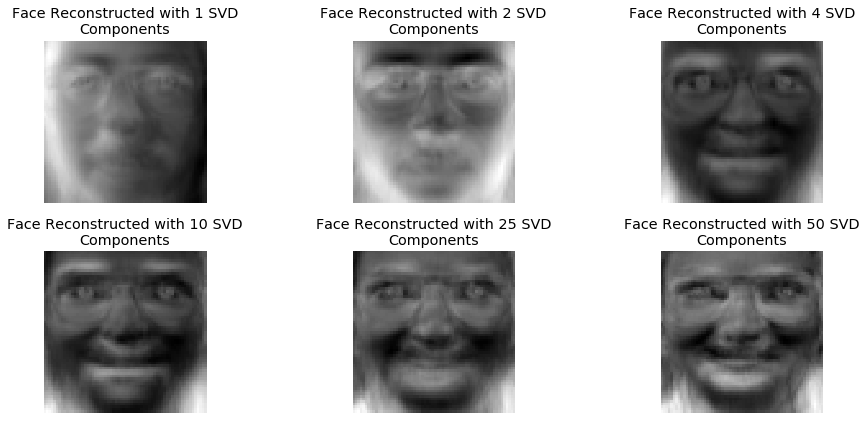

In [5]:
# Using numpy's svd function to perform singular value decomposition
# This returns the three matrices 
U, S, VT = svd(faces_centered)


# Plot all faces using the S matrix 
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
for ax, dim in zip(axs.flatten(), [1, 2, 4, 10, 25, 50]):
    # create s matrix of zeros
    S_reduced = np.zeros(faces_centered.shape)
    # fill the diagonal 
    np.fill_diagonal(S_reduced, S)
    # Set all but first dim singular values equal to zero.
    S_reduced[:, dim:] = 0
    faces_reconstructed = U @ S_reduced @ VT
    first_face_reconstructed = faces_reconstructed[0].reshape(image_shape)
    ax.imshow(first_face_reconstructed, cmap=cm.gray)
    ax.set_title("Face Reconstructed with {} SVD\nComponents".format(dim))
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()

If you look at the reconstructed faces in PCA notebook from before, these look remarkably similar, hinting at a deeper connection.

## SVD for topic analysis

We can use SVD to determine what we call ***latent features*** or hidden features in your data. This will be best demonstrated with an example.

### Example

Let's look at users ratings of different movies. The ratings are from 1-5. A rating of 0 means the user hasn't watched the movie.

|       | Matrix | Alien | StarWars | Casablanca | Titanic |
| ----- | ------ | ----- | -------- | ---------- | ------ |
| **Alice** |      1 |     2 |        2 |          0 |      0 |
|   **Bob** |      3 |     5 |        5 |          0 |      0 |
| **Cindy** |      4 |     4 |        4 |          0 |      0 |
|   **Dan** |      5 |     5 |        5 |          0 |      0 |
| **Emily** |      0 |     2 |        0 |          4 |      4 |
| **Frank** |      0 |     0 |        0 |          5 |      5 |
|  **Greg** |      0 |     1 |        0 |          2 |      2 |

Note that the first three movies (Matrix, Alien, StarWars) are Sci-fi movies and the last two (Casablanca, Titanic) are Romance. We will be able to mathematically pull out these topics!

Let's do the computation with Python.  First let's put the data into a pandas dataframe:

In [6]:
rating_matrix = np.array([
              [1, 2, 2, 0, 0],
              [3, 5, 5, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

movies = ['TheMatrix', 'Alien', 'StarWars', 'Casablanca', 'Titanic']
users = ['Alice', 'Bob', 'Cindy', 'Dan', 'Emily', 'Frank', 'Greg']
ratings_df = pd.DataFrame(rating_matrix, index=users, columns=movies)
print(ratings_df)

       TheMatrix  Alien  StarWars  Casablanca  Titanic
Alice          1      2         2           0        0
Bob            3      5         5           0        0
Cindy          4      4         4           0        0
Dan            5      5         5           0        0
Emily          0      2         0           4        4
Frank          0      0         0           5        5
Greg           0      1         0           2        2


Numpy can compute the full SVD.

In [7]:
U, sigma, VT = svd(rating_matrix)

In [8]:
U, sigma, VT = (np.around(x, 2) for x in (U, sigma, VT))

U_df = pd.DataFrame(U, index=users)
VT_df = pd.DataFrame(VT, columns=movies)

In [9]:
print(U_df.shape)
print(sigma.shape)
print(VT_df.shape)

(7, 7)
(5,)
(5, 5)


The VT matrix has columns indexed by movies.

In [10]:
print(VT_df)

   TheMatrix  Alien  StarWars  Casablanca  Titanic
0      -0.50  -0.62     -0.60       -0.06    -0.06
1       0.09  -0.05      0.11       -0.70    -0.70
2      -0.78   0.62      0.03       -0.07    -0.07
3      -0.36  -0.48      0.79        0.05     0.05
4       0.00   0.00     -0.00       -0.71     0.71


We can interpret the *rows* of this matrix as some latent features.  There is *something* about these movies that is

  - Being measured in each row.
  - Being inferred from how users rated the movies as a whole.

For example, the **first row** seems to draw a strong distinction between science fiction and romantic movies.

The U matrix has rows indexed by *users*.

In [11]:
print(U_df)

          0     1     2     3     4     5     6
Alice -0.21  0.02  0.31  0.26  0.66 -0.51  0.33
Bob   -0.55  0.06  0.53  0.46 -0.33  0.25 -0.16
Cindy -0.50  0.07 -0.31 -0.20 -0.37 -0.67 -0.18
Dan   -0.62  0.08 -0.39 -0.24  0.36  0.48  0.18
Emily -0.12 -0.60  0.40 -0.52  0.20 -0.00 -0.40
Frank -0.04 -0.73 -0.42  0.53 -0.00  0.00 -0.00
Greg  -0.06 -0.30  0.20 -0.26 -0.40 -0.00  0.80


Each of the rows in this matrix contains *weights*, they measure how important each *latent feature* is to each user's ratings.

**Note:** that the last two columns of this matrix *do not matter* for reconstructing X.  These are the columns for which the associated rows of the singular value matrix are **completely zero**.

If we want to figure out an approximation of the user's rating of the movies using **only** the first two latent features, we can zero out all but the first two singular values.

In [12]:
# Zero out all but the first two singular values
sigma_reduced = np.zeros(rating_matrix.shape)
np.fill_diagonal(sigma_reduced, sigma)
sigma_reduced[:, 2:] = 0

# Reoconstruct the ratings matrix
ratings_reconstructed = U @ sigma_reduced @ VT

ratings_reconstructed_df = pd.DataFrame(ratings_reconstructed, index=users, columns=movies)
print('Reconstructed Matrix:\n')
print(ratings_reconstructed_df)
print('\nOriginal Matrix of Actual Data:\n')
print(ratings_df)

Reconstructed Matrix:

       TheMatrix     Alien  StarWars  Casablanca   Titanic
Alice   1.470336  1.792448  1.764784    0.041104  0.041104
Bob     3.857408  4.690880  4.630032    0.056880  0.056880
Cindy   3.519976  4.257080  4.225304   -0.051280 -0.051280
Dan     4.358944  5.282016  5.232256   -0.018272 -0.018272
Emily   0.316320  1.315296  0.368160    4.098048  4.098048
Frank  -0.348664  0.690712 -0.432296    4.897936  4.897936
Greg    0.158160  0.657648  0.184080    2.049024  2.049024

Original Matrix of Actual Data:

       TheMatrix  Alien  StarWars  Casablanca  Titanic
Alice          1      2         2           0        0
Bob            3      5         5           0        0
Cindy          4      4         4           0        0
Dan            5      5         5           0        0
Emily          0      2         0           4        4
Frank          0      0         0           5        5
Greg           0      1         0           2        2


This seems to be a pretty good reconstruction of the ratings matrix, even though we only kept two singular values.

If we investigate, the first two singular values are by far the largest:

In [13]:
print(sigma)

[13.84  9.52  1.69  1.02  0.  ]


We seem to have picked up some **negative** ratings, which is weird.  Tomorrow we will study a procedure to fix this issue.

### The Relationship Between PCA and SVD

The PCA algorithm can be expressed as the following matrix equation:

$$ X^t X = E^t D E $$

where

  - $E$ is the matrix of eigenvectors of $X^t X$ (i.e. principal components, stored in the rows as `sklearn` does).
  - $D$ is a *diagonal* matrix.  The diagonal entries are the eigenvalues of $X^t X$.


Suppose that we factor $X$ into its singular value decomposition

$$ X = U S V $$

We can plug this into $X^t X$ and derive a relationship between PCA and the SVD factorization.

$$ X^t X = (U S V^t)^t (U S V^t) = V S^t U^t U S V^t $$

But $U$ is orthogonal, so the inner $U^t U$ is the identity matrix:

$$ X^t X = V S^t S V^t $$

Recall that $S$ is $n \times p$ a matrix like this:
    
$$ S =  \left( \begin{array}{cc} 
\sigma_1 & 0 & 0  \\       
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{array} \right) $$



**Exercise**: Compute $S^t S$ for this matrix.

So, $S^t S$ is a $p \times p$ matrix like this:
    
$$ S^t S =  \left( \begin{array}{cc} 
\sigma_1^2 & 0 & 0  \\       
0 & \sigma_2^2 & 0 \\
0 & 0 & \sigma_3^2 \\
\end{array} \right) $$

Comparing the two expressions for $X^t X$

#### PCA

$$ X^t X = E^t D E $$

#### SVD

$$ X^t X = V S^t S V^t $$

We deduce the following

#### Relationship between PCA and SVD

$$ E^t = V $$
$$ D = S^t S $$

So the **eigenvectors** from PCA are the **columns** of the matrix V.

And, the **eigenvalues** from PCA are the **squares of the singular values**.

### Why PCA With SVD?

While the above shows its **possible** to compute the principal components with SVD, it does not argue that it is **beneficial**.  Let's look at a hypothetical example.

Suppose our data set $X$ contains gray-scale image data:

  - $500$ images.
  - Each image is $200 \times 200$ pixels.  So, $40,000$ total pixels.

Therefore, $X$ is a $500 \times 40,000$ matrix.  Many, many more columns than rows.

**Note:** This is commonly called the $p \gg n$ situation.

Now, **PCA** needs to compute the matrix $X^t X$.

This is a $40,000 \times 40,000$ matrix, so it has $1,600,000,000 = 1.6 \times 10^9$ entries.

One floating point number is:
  - $64$ bits (on a modern computer)
  - $8$ bytes (each byte is $8$ bits).

So, $X^t X$ takes

$$ 8 \times 1.6 \times 10^9 = 12.8 \times 10^9 $$

bytes of data to store.  This is $12.8$ gigabytes.  **A huge amount of data**.

SVD **does not have to compute the $X^t X$ matrix, it operates completely on $X$ itself**.  Much more efficient.

Sklearn's implementation uses SVD to find the eigenvectors and eigenvalues of the covariance matrix.  